In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('figure', facecolor = 'w')
plt.rc('figure', dpi=100)
plt.rc('font', size=14)
import csky as cy
import healpy as hp
import scipy.stats
#cy.plotting.mrichman_mpl()

In [2]:
sbc = sns.color_palette( n_colors=15
                          )

In [3]:
#colors = [ sbc[9], '#E37222', '#343E78', '#800000', 'grey']
colors = ['#0B3D53', '#FF7F0E',  '#5C9FC9']

In [4]:
colors

['#0B3D53', '#FF7F0E', '#5C9FC9']

In [5]:
plot_dir = cy.utils.ensure_dir('/home/ssclafani/public_html/DNNC/paperplots')

In [6]:
kra5, _, _, ebins5 = np.load('/data/ana/analyses/NuSources/2021_DNNCascade_analyses/templates/KRA-gamma_5PeV_maps_energies.tuple.npy', allow_pickle = True, encoding='latin1')
kra50, _, _, ebins50 = np.load('/data/ana/analyses/NuSources/2021_DNNCascade_analyses/templates/KRA-gamma_maps_energies.tuple.npy', allow_pickle=True, encoding='latin1')
pi0 = np.load('/data/ana/analyses/NuSources/2021_DNNCascade_analyses/templates/Fermi-LAT_pi0_map.npy', allow_pickle=True, encoding='latin1')


In [7]:
import healpy as hp
a = hp.nside2pixarea(128)
print(a)

6.391586616190171e-05


In [8]:
dat = np.loadtxt('saved_sens/piecewise_fitresult.txt', skiprows = 13)
x = dat[:,0]
x_err_low = x - dat[:,1]
x_err_high = dat[:,2] - x

# from fit
tnorm = 1.e-8 * (4*np.pi)

y = tnorm * dat[:,3]

y_max = tnorm * dat[:,-1]
y_min = tnorm * dat[:,-2]

y_err_high = y_max - y
y_err_low = y - y_min

indices_UL = np.array([5,8,9, 10, 11, 12])

# visualize upper limits with corresponding marker
y[indices_UL] = y[indices_UL]+y_err_high[indices_UL]

uplims = np.zeros(x.shape)
uplims[[indices_UL]]=True

# plot the points with non-zero best fit (i.e. not upper-limits)
x_new = np.delete(x, indices_UL)
x_err_high_new = np.delete(x_err_high, indices_UL)
x_err_low_new = np.delete(x_err_low, indices_UL)

y_new = np.delete(y, indices_UL)
y_err_high_new = np.delete(y_err_high, indices_UL)
y_err_low_new = np.delete(y_err_low, indices_UL)

/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


In [9]:
georg_flux = np.load('/data/user/gschwefer/misc/for_steve/fermi_pi0_gamma_ray_allsky_average_E2Phi_2.7_extrapol.npy', allow_pickle=True)
georg_energy = np.load('/data/user/gschwefer/misc/for_steve/fermi_pi0_gamma_ray_energies.npy', allow_pickle=True)
georg_flux = 0.31* georg_flux

In [10]:
hans_result = np.loadtxt('saved_sens/Cascades_PRL_2010_11_12_13_14_15_pp_nominal_1sigma.txt', skiprows=1)

In [11]:
hans_gammas = hans_result[:,0]
hans_norm = hans_result[:,1]

In [12]:
hans_flux = {}
for i, gamma in enumerate(hans_gammas):
    Es = np.linspace(16000,2.6e6, 1000)
    hans_flux[gamma] =  Es**2*1e-18*hans_norm[i]*((Es/1e5)**(-1*hans_gammas[i]))
    
bestfithans = Es**2*1e-18*1.66*((Es/1e5)**-2.53)

In [13]:
np.log10(16000)

4.204119982655925

In [14]:
points = np.ndarray((len(hans_gammas), 1000))
xs = np.logspace(4.20411998,6.41497334,1000)

for i, gamma in enumerate(hans_gammas):
    points[i] = np.interp(np.log10(xs) ,np.log10(Es), hans_flux[gamma])
    

In [15]:
print(points.shape)

mins = np.min(points, axis=0)
maxs = np.max(points, axis=0)

(67, 1000)


(5e-10, 1e-06)

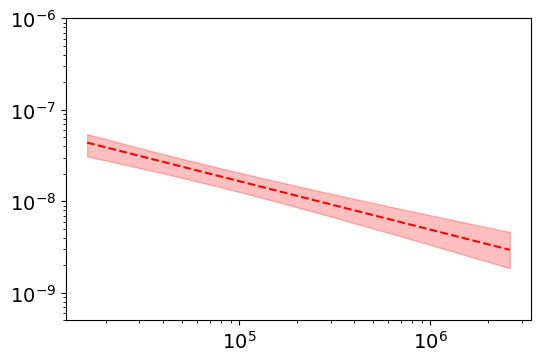

In [16]:
#for gamma in (hans_gammas):
#    plt.plot(Es, hans_flux[gamma], c='grey')
#for i, gamma in enumerate(hans_gammas):
#    plt.plot(xs, points[i])
plt.fill_between(xs, mins, maxs, color='r', alpha=0.25)
plt.plot(Es, bestfithans, c='r', ls='--')
plt.loglog()
plt.ylim(5e-10,1e-6)
#plt.xlim(1e4,1e8)

In [17]:
''' pi0flux = [1271.8527801661924, 0.020005181457912437,
1553.1845690893892, 0.01852439272816013,
1922.519128617942, 0.016478593938396482,
2381.49216131387, 0.014615905579883785,
2895.9554838722925, 0.012866607693166323,
3585.370348580028, 0.011101706303158538,
4375.590098581272, 0.009635108280540587,
5397.82609630125, 0.008285718315429003,
6645.846422152243, 0.007095591309854342,
8182.418973649131, 0.006067527085469145,
10074.25932040286, 0.005203618510847123,
12318.748238749182, 0.004495475813262984,
15166.940810483744, 0.0038723560749193814,
19149.109652203424, 0.0032775651321566347,
23576.536108990374, 0.0028150126763895286,
28772.831793568785, 0.0024502918550690176,
35494.8107159693, 0.002113304010356377,
43701.49326658316, 0.001825711674448281,
53717.853633984676, 0.0015706784002100286,
65793.2201885699, 0.0013546635088702511,
81005.13599200615, 0.0011600851314746696,
94194.95560159562, 0.001041064937747737
]
pi0_EGeV = np.array(pi0flux[::2]) /1e3
pi0_fluxGeV = np.array(pi0flux[1::2])  /1e3    
b1, b0, _r, _p_val, _stderr = scipy.stats.linregress(np.log10(pi0_EGeV[11:]), 
                                           np.log10(pi0_fluxGeV[11:])) 
x_pred = np.linspace(2,7, 100)
y_pred = b1 * x_pred + b0   '''

' pi0flux = [1271.8527801661924, 0.020005181457912437,\n1553.1845690893892, 0.01852439272816013,\n1922.519128617942, 0.016478593938396482,\n2381.49216131387, 0.014615905579883785,\n2895.9554838722925, 0.012866607693166323,\n3585.370348580028, 0.011101706303158538,\n4375.590098581272, 0.009635108280540587,\n5397.82609630125, 0.008285718315429003,\n6645.846422152243, 0.007095591309854342,\n8182.418973649131, 0.006067527085469145,\n10074.25932040286, 0.005203618510847123,\n12318.748238749182, 0.004495475813262984,\n15166.940810483744, 0.0038723560749193814,\n19149.109652203424, 0.0032775651321566347,\n23576.536108990374, 0.0028150126763895286,\n28772.831793568785, 0.0024502918550690176,\n35494.8107159693, 0.002113304010356377,\n43701.49326658316, 0.001825711674448281,\n53717.853633984676, 0.0015706784002100286,\n65793.2201885699, 0.0013546635088702511,\n81005.13599200615, 0.0011600851314746696,\n94194.95560159562, 0.001041064937747737\n]\npi0_EGeV = np.array(pi0flux[::2]) /1e3\npi0_fluxGe

In [33]:
erange_kra5 = [5000, 160000]
erange_kra50 = [6500, 315000]
erange_pi0 = [1800, 316000]

#ranges from ts
#erange_kra5 = [800, 100000]
#erange_kra50 = [1000, 146000]
#erange_pi0 = [800, 69000]

In [34]:
mask5 = (ebins5 > erange_kra5[0]) & (ebins5 < erange_kra5[1])
mask50 = (ebins50 > erange_kra50[0]) & (ebins50 < erange_kra50[1])
#maskpi0 = (10**x_pred > 1500) & (10**x_pred < 315000)
maskpi0_georg = (georg_energy > np.log10(erange_pi0[0])) & (georg_energy < np.log10(erange_pi0[1]))

In [35]:
pi0modelnorm = 4.43e-12
pi0_range = [1.7e-11, 2.18e-11, 2.69e-11]
pi0_range = np.array(pi0_range) / pi0modelnorm
print(pi0_range)
print(pi0_range[0] - pi0_range[1])
print(pi0_range[2] - pi0_range[1])

[3.83747178 4.92099323 6.07223476]
-1.0835214446952595
1.1512415349887126


In [36]:
#pi0_range = [4.23, 5.45, 7]
kra5_range = [.659, .893,  1.13]
kra50_range = [.423, .591, 0.768]

In [37]:
print(kra5_range[0] - kra5_range[1])
print(kra5_range[2] - kra5_range[1])

-0.23399999999999999
0.23699999999999988


In [38]:
print(kra50_range[0] - kra50_range[1])
print(kra50_range[2] - kra50_range[1])

-0.16799999999999998
0.17700000000000005


-> /home/ssclafani/public_html/DNNC/paperplots/gp_flux


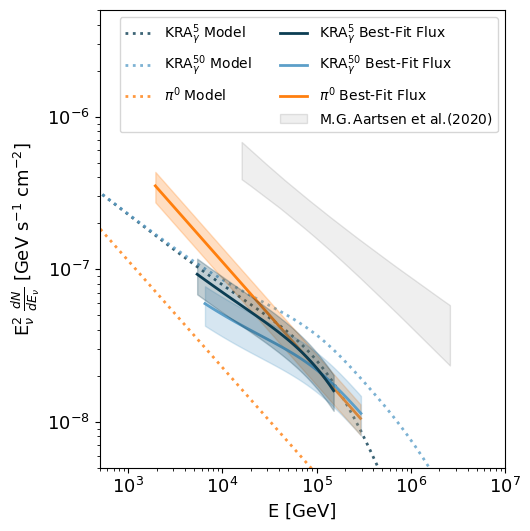

In [39]:
fig , ax = plt.subplots(figsize=(5.5,5.5))
plt.rc('font', size=10)
ax.plot(ebins5, ebins5**2 * (sum(kra5)) * hp.nside2pixarea(128) / 3 , ls=':', color=colors[0] ,
        lw=2, alpha=0.8, label='KRA$_\gamma^{5}$ Model')
ax.plot(ebins50, ebins50**2 * (sum(kra50)) * hp.nside2pixarea(128)/ 3, ls=':', color=colors[2],
        lw=2, alpha=0.8, label='KRA$_\gamma^{50}$ Model')
ax.plot(10**georg_energy, 4*np.pi*georg_flux, color=colors[1],
        lw=2, alpha=0.8, ls=':', label='$\pi^0$ Model')

ax.plot(np.nan, np.nan, label=' ', alpha=0)


#ax.plot(10 ** x_pred, 4*np.pi*10 ** y_pred, lw=3, linestyle = ":", 
#           label='$\pi^0$ Model')
'''(_, caps, _) = ax.errorbar(x[indices_UL], y[indices_UL], 
                           xerr=[x_err_low[indices_UL], x_err_high[indices_UL]], yerr=y[indices_UL]*0.5, fmt='o', 
                           c='dimgrey', linewidth=2.0, zorder=30, uplims=True, markersize=0)
(_, caps2, _) = ax.errorbar(x_new, y_new, xerr=[x_err_low_new, x_err_high_new], 
                            yerr=[y_err_low_new, y_err_high_new], fmt='o', c ='dimgrey', label="All-Sky Measured Flux", linewidth=2.0, zorder=31, markersize=0)
(_, caps4, _) = ax.errorbar(x_new, y_new, yerr=[y_err_low_new, y_err_high_new], 
                            fmt='o', c='dimgrey' , linewidth=2.0, zorder=31, markersize=0, capsize=0)

for cap in caps:
    cap.set_markeredgewidth(2)
'''
kra5_plot = ebins5[mask5]**2 *(sum(kra5)[mask5]) * hp.nside2pixarea(128)/ 3

ax.plot(ebins5[mask5], kra5_range[1] * kra5_plot , 
         c =colors[0], ls='-', zorder=10, lw=2, label='KRA$_\gamma^{5}$ Best-Fit Flux')
ax.fill_between(ebins5[mask5], kra5_range[0] * kra5_plot , kra5_range[-1] * kra5_plot,
        color = colors[0], alpha=.25, zorder=10)

kra50_plot = ebins50[mask50]**2 *(sum(kra50)[mask50]) * hp.nside2pixarea(128) / 3
ax.plot(ebins50[mask50], kra50_range[1] * kra50_plot,
         c =colors[2], ls='-', zorder=5, lw=2, label='KRA$_\gamma^{50}$ Best-Fit Flux')
ax.fill_between(ebins50[mask50],kra50_range[0] * kra50_plot, kra50_range[-1] * kra50_plot ,
        color = colors[2], zorder=5,  alpha=.25)

ax.plot(10**georg_energy[maskpi0_georg], pi0_range[1]*4*np.pi*georg_flux[maskpi0_georg], 
        lw=2, c=colors[1], ls='-', zorder=3,
        label='$\pi^0$ Best-Fit Flux')
ax.fill_between(10**georg_energy[maskpi0_georg], pi0_range[0]*4*np.pi*georg_flux[maskpi0_georg],
                pi0_range[-1]*4*np.pi*georg_flux[maskpi0_georg], zorder=3, color=colors[1], alpha=.25 )


#plt.plot(Es, 4*np.pi*bestfithans, c='dimgrey', lw='1', alpha=0.4, ls='--', label='M.G.Aartsen(2020)')
plt.fill_between(xs, 4*np.pi*mins, 4*np.pi*maxs, color='dimgrey', alpha=0.1,
                 edgecolor='k', label=r'M.G.$\,$Aartsen et al.(2020)')

plt.loglog()
#ax.set_ylim(1e-12,5e-9)
ax.set_ylim(5e-9,5e-6)
ax.set_xlim(500, 1e7)
plt.legend(ncol=2)
plt.rc('font', size=13)
ax.set_ylabel(r'E$_{\nu}^2$ $\frac{dN}{dE_\nu}$ [GeV s$^{-1}$ cm$^{-2}$]')
ax.set_xlabel('E$_\nu$ [GeV]')
plt.tight_layout()
cy.plotting.saving(plot_dir, 'gp_flux')

-> /home/ssclafani/public_html/DNNC/paperplots/gp_flux_sr


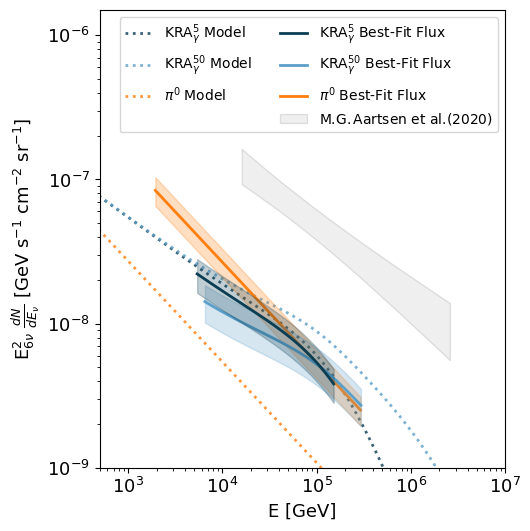

In [54]:
fig , ax = plt.subplots(figsize=(5.5,5.5))
plt.rc('font', size=10)
ax.plot(ebins5, ebins5**2 * (sum(kra5)) * hp.nside2pixarea(128) / (4*np.pi) , ls=':', color=colors[0] ,
        lw=2, alpha=0.8, label='KRA$_\gamma^{5}$ Model')
ax.plot(ebins50, ebins50**2 * (sum(kra50)) * hp.nside2pixarea(128)/ (4*np.pi), ls=':', color=colors[2],
        lw=2, alpha=0.8, label='KRA$_\gamma^{50}$ Model')
ax.plot(10**georg_energy, 3*georg_flux, color=colors[1],
        lw=2, alpha=0.8, ls=':', label='$\pi^0$ Model')

ax.plot(np.nan, np.nan, label=' ', alpha=0)

kra5_plot = ebins5[mask5]**2 *(sum(kra5)[mask5]) * hp.nside2pixarea(128)/ (4*np.pi)

ax.plot(ebins5[mask5], kra5_range[1] * kra5_plot , 
         c =colors[0], ls='-', zorder=10, lw=2, label='KRA$_\gamma^{5}$ Best-Fit Flux')
ax.fill_between(ebins5[mask5], kra5_range[0] * kra5_plot , kra5_range[-1] * kra5_plot,
        color = colors[0], alpha=.25, zorder=10)

kra50_plot = ebins50[mask50]**2 *(sum(kra50)[mask50]) * hp.nside2pixarea(128) / (4*np.pi)
ax.plot(ebins50[mask50], kra50_range[1] * kra50_plot,
         c =colors[2], ls='-', zorder=5, lw=2, label='KRA$_\gamma^{50}$ Best-Fit Flux')
ax.fill_between(ebins50[mask50],kra50_range[0] * kra50_plot, kra50_range[-1] * kra50_plot ,
        color = colors[2], zorder=5,  alpha=.25)

ax.plot(10**georg_energy[maskpi0_georg], 3*pi0_range[1]*georg_flux[maskpi0_georg], 
        lw=2, c=colors[1], ls='-', zorder=3,
        label='$\pi^0$ Best-Fit Flux')
ax.fill_between(10**georg_energy[maskpi0_georg], 3*pi0_range[0]*georg_flux[maskpi0_georg],
                3*pi0_range[-1]*georg_flux[maskpi0_georg], zorder=3, color=colors[1], alpha=.25 )


#plt.plot(Es, 4*np.pi*bestfithans, c='dimgrey', lw='1', alpha=0.4, ls='--', label='M.G.Aartsen(2020)')
plt.fill_between(xs, 3*mins,3* maxs, color='dimgrey', alpha=0.1,
                 edgecolor='k', label=r'M.G.$\,$Aartsen et al.(2020)')

plt.loglog()
#ax.set_ylim(1e-12,5e-9)
ax.set_ylim(1e-9,1.5e-6)
ax.set_xlim(500, 1e7)
plt.legend(ncol=2)
plt.rc('font', size=13)
ax.set_ylabel(r'E$_{6\nu}^2$ $\frac{dN}{dE_\nu}$ [GeV s$^{-1}$ cm$^{-2}$ sr$^{-1}$]')
ax.set_xlabel('E [GeV]')
plt.tight_layout()
cy.plotting.saving(plot_dir, 'gp_flux_sr')